# Plot With Pandas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/"
    "data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

type(df)

pandas.core.frame.DataFrame

In [3]:
# make sure pandas doesn’t hide any columns
pd.set_option("display.max.columns", None)

df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


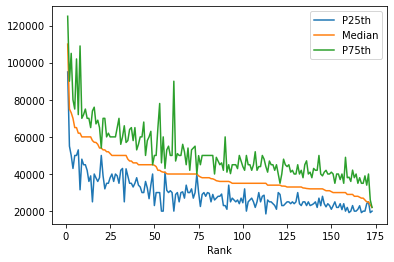

In [4]:
# Line graph
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.show()

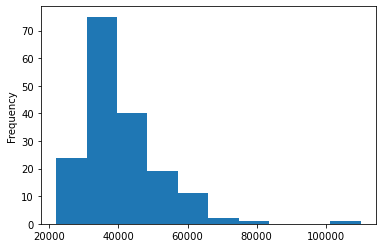

In [5]:
# Histogram
median_column = df["Median"]
type(median_column)
median_column.plot(kind="hist")
plt.show()

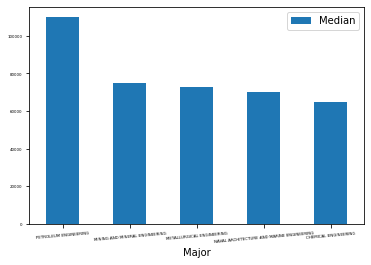

In [6]:
# Outliers
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)
plt.show()

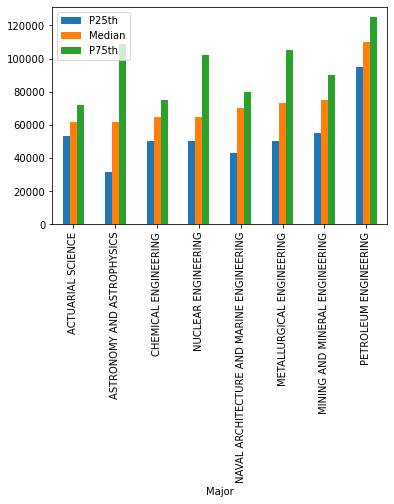

In [7]:
# investigate all majors whose median salary is above $60,000
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")
plt.show()

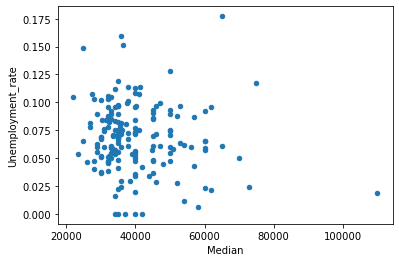

In [8]:
# Check for Correlation
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

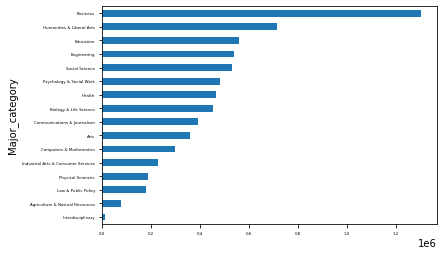

In [9]:
# Analyze Categorical Data
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()

cat_totals

cat_totals.plot(kind="barh", fontsize=4)

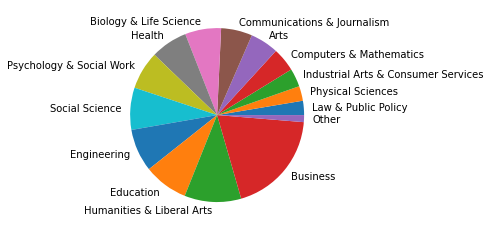

In [10]:
# Determining Ratios
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]

# Adding a new item "Other" with the sum of the small categories
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")
plt.show()

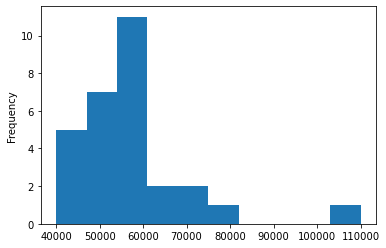

In [11]:
# Zooming in on Categories
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")